# PRCP-1014

#### Vaccinatino Prediction Description- Project

Team Members: Vivek Viswanathan, Sushree Sarangi, Vartika Vishnoi, and Prabhati Acharya

In [5]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.calibration import CalibratedClassifierCV
from pandas_profiling import ProfileReport
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.externals.six import StringIO
import graphviz

import warnings
warnings.simplefilter('ignore')

In [6]:
rand_state = 10
n_iterations = 5

In [7]:
# Load the data
feature_data = pd.read_csv('../../Data/features.csv')

In [8]:
feature_data.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [9]:
feature_data.shape

(26707, 36)

In [10]:
label_data= pd.read_csv('../../Data/labels.csv')

In [11]:
label_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [12]:
label_data.shape

(26707, 3)

In [13]:
vaccine_data=pd.concat([feature_data, label_data],sort=False)

In [14]:
vaccine_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,NaN,NaN
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,NaN,NaN
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,NaN,NaN


In [16]:
print("Shape :",vaccine_data.shape)
print("Rows : ",vaccine_data.shape[0])
print("Columns : ",vaccine_data.shape[1])
print("\nFeatures : \n" ,vaccine_data.columns.tolist())
print("\n Missing Values : ",vaccine_data.isnull().sum().values.sum())
print("\nUnique Values : \n" ,vaccine_data.nunique(dropna=False))

Shape : (53414, 38)
Rows :  53414
Columns :  38

Features : 
 ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine']

 Missing Values :  1048921

Unique Values : 
 respondent_id                  26707
h1n1_concern                       5
h1n1_knowledg

In [17]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53414 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                53414 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [18]:
vaccine_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,53414.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.718984,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.750000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [19]:
print('\nUnique values of vaccine_data.h1n1_concern:: \n',vaccine_data.h1n1_concern.value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_knowledge:: \n',vaccine_data.h1n1_knowledge.value_counts(dropna = False))
print('\nUnique values of behavioral_antiviral_meds:: \n',vaccine_data.behavioral_antiviral_meds.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_avoidance:: \n',vaccine_data.behavioral_avoidance.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_face_mask:: \n',vaccine_data.behavioral_face_mask.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_wash_hands:: \n',vaccine_data.behavioral_wash_hands.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_large_gatherings:: \n',vaccine_data.behavioral_large_gatherings.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_outside_home:: \n',vaccine_data.behavioral_outside_home.value_counts(dropna = False))
print('\nUnique values of vaccine_data.behavioral_touch_face:: \n',vaccine_data.behavioral_touch_face.value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_h1n1 :: \n',vaccine_data.doctor_recc_h1n1 .value_counts(dropna = False))
print('\nUnique values of vaccine_data.doctor_recc_seasonal :: \n',vaccine_data.doctor_recc_seasonal .value_counts(dropna = False))
print('\nUnique values of vaccine_data.chronic_med_condition :: \n',vaccine_data.chronic_med_condition .value_counts(dropna = False))
print('\nUnique values of vaccine_data.child_under_6_months:: \n',vaccine_data.child_under_6_months.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_worker:: \n',vaccine_data.health_worker.value_counts(dropna = False))
print('\nUnique values of vaccine_data.health_insurance :: \n',vaccine_data.health_insurance .value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_vacc_effective:: \n',vaccine_data.opinion_h1n1_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_risk:: \n',vaccine_data.opinion_h1n1_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_h1n1_sick_from_vacc:: \n',vaccine_data.opinion_h1n1_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_vacc_effective:: \n',vaccine_data.opinion_seas_vacc_effective.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_risk:: \n',vaccine_data.opinion_seas_risk.value_counts(dropna = False))
print('\nUnique values of vaccine_data.opinion_seas_sick_from_vacc:: \n',vaccine_data.opinion_seas_sick_from_vacc.value_counts(dropna = False))
print('\nUnique values of vaccine_data.age_group:: \n',vaccine_data.age_group.value_counts(dropna = False))
print('\nUnique values of vaccine_data.education :: \n',vaccine_data.education .value_counts(dropna = False))
print('\nUnique values of vaccine_data.race :: \n',vaccine_data.race .value_counts(dropna = False))
print('\nUnique values of vaccine_data.sex  :: \n',vaccine_data.sex  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.income_poverty  :: \n',vaccine_data.income_poverty .value_counts(dropna = False))
print('\nUnique values of vaccine_data.marital_status  :: \n',vaccine_data.marital_status  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.rent_or_own  :: \n',vaccine_data.rent_or_own  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_status  :: \n',vaccine_data.employment_status .value_counts(dropna = False))
print('\nUnique values of vaccine_data.hhs_geo_region   :: \n',vaccine_data.hhs_geo_region .value_counts(dropna = False))
print('\nUnique values of vaccine_data.census_msa   :: \n',vaccine_data.census_msa  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_adults:: \n',vaccine_data.household_adults.value_counts(dropna = False))
print('\nUnique values of vaccine_data.household_children:: \n',vaccine_data.household_children.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_industry:: \n',vaccine_data.employment_industry.value_counts(dropna = False))
print('\nUnique values of vaccine_data.employment_occupation :: \n',vaccine_data.employment_occupation .value_counts(dropna = False))
print('\nUnique values of vaccine_data.h1n1_vaccine  :: \n',vaccine_data.h1n1_vaccine  .value_counts(dropna = False))
print('\nUnique values of vaccine_data.seasonal_vaccine  :: \n',vaccine_data.seasonal_vaccine .value_counts(dropna = False))



Unique values of vaccine_data.h1n1_concern:: 
 NaN    26799
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

Unique values of vaccine_data.h1n1_knowledge:: 
 NaN    26823
1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

Unique values of behavioral_antiviral_meds:: 
 NaN    26778
0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

Unique values of vaccine_data.behavioral_avoidance:: 
 NaN    26915
1.0    19228
0.0     7271
Name: behavioral_avoidance, dtype: int64

Unique values of vaccine_data.behavioral_face_mask:: 
 NaN    26726
0.0    24847
1.0     1841
Name: behavioral_face_mask, dtype: int64

Unique values of vaccine_data.behavioral_wash_hands:: 
 NaN    26749
1.0    22015
0.0     4650
Name: behavioral_wash_hands, dtype: int64

Unique values of vaccine_data.behavioral_large_gatherings:: 
 NaN    26794
0.0    17073
1.0     9547
Name: behavioral_large_gatherings, dtype: int64

Unique values of vaccin

In [20]:
#for i in total_data:
   # df=print('\nUnique values :: \n',vaccine_data[i].value_counts(dropna = False)) 
    

In [21]:
vaccine_data.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

###### Grouping columns into Categorical and Continuous column list

In [22]:
# Grouping columns into Categorical and Continuous column list
Catvar_list=['income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa','employment_industry','employment_occupation']
Convar_list=['h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face','household_adults','household_children']


###### Checking the distribution of data for continuous variables

In [23]:
#for i in Convar_list:
    #df[i]=total_data[i].astype('float').astype(int)
    #df[i]=total_data[i]
    #df.dtypes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029386523048>,
      dtype=object)

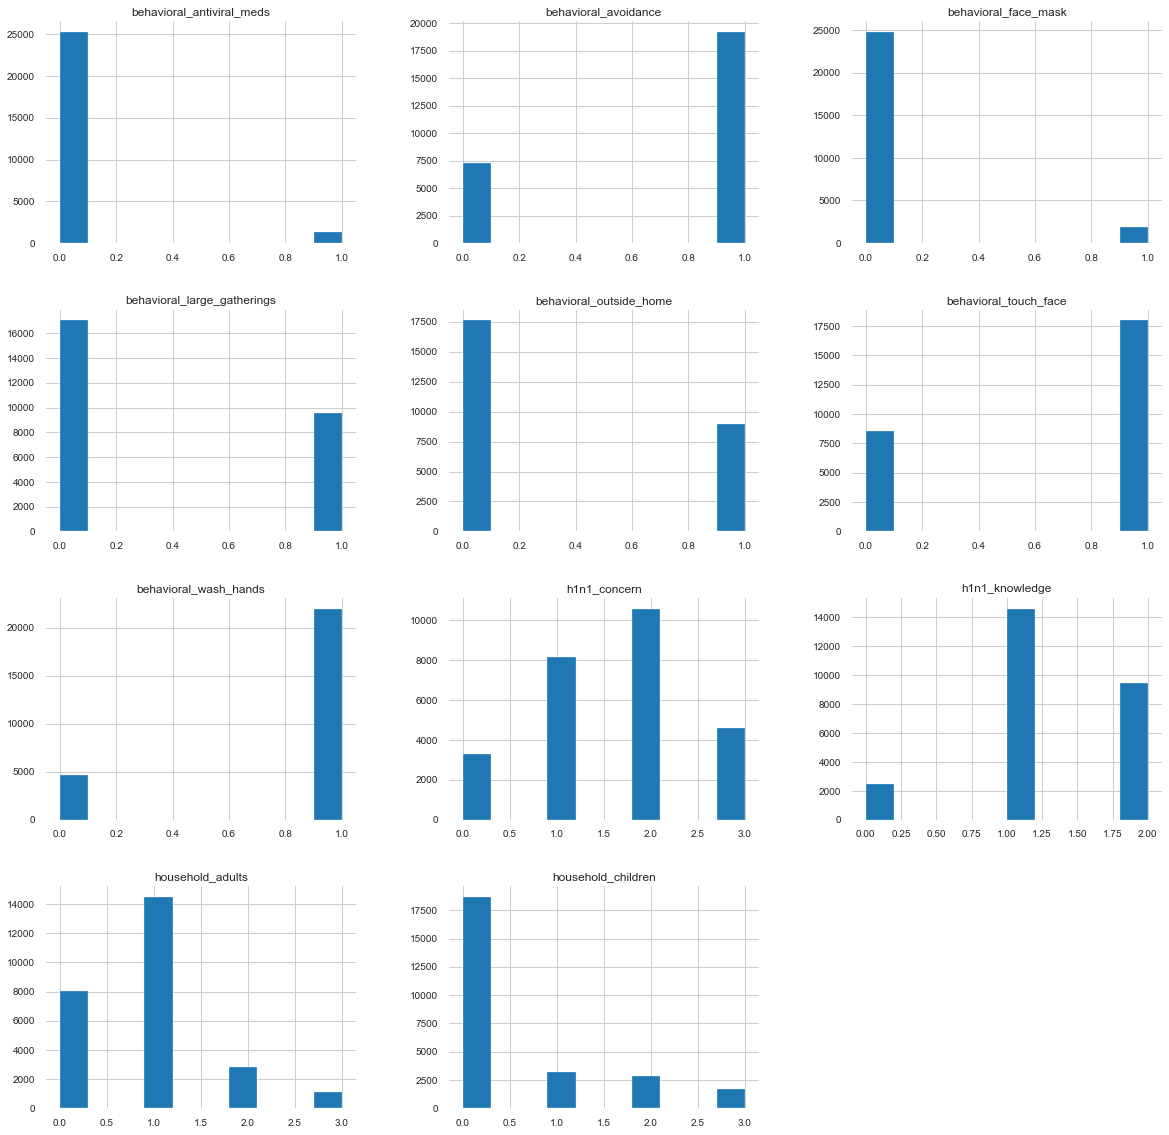

In [24]:
vaccine_data[Convar_list].hist(figsize=(20,20))

###### Checking the Data distribution for the Categorical features

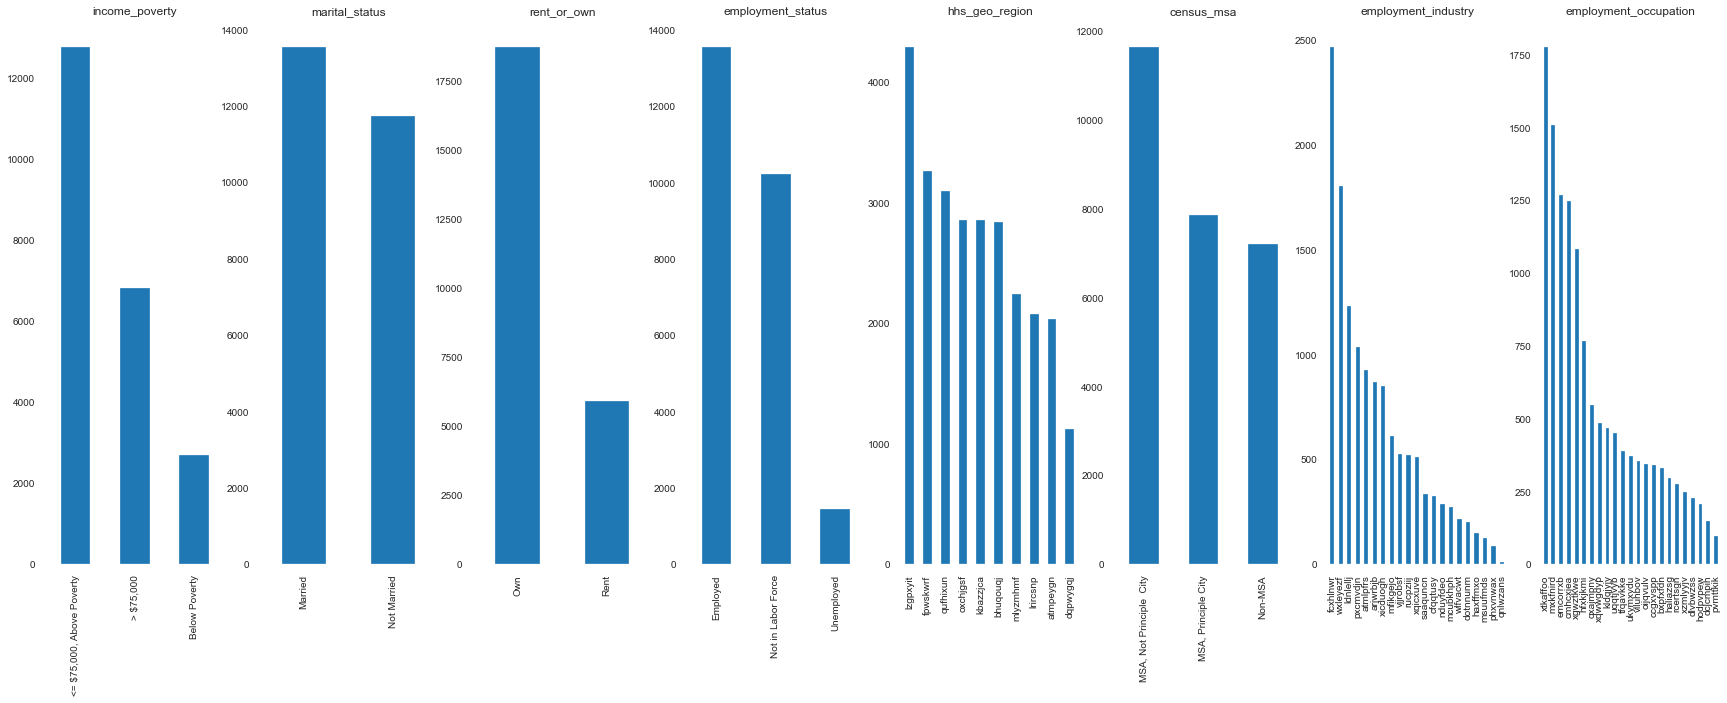

In [25]:
#Plot categorical data using Seaborn's facegrid and Panda's melt function
fig, ax=plt.subplots(1, len(Catvar_list) , figsize=(30,10))
for i, j in enumerate(vaccine_data[Catvar_list]):
    vaccine_data[j].value_counts().plot(kind="bar", ax=ax[i]).set_title(j)
    
fig.show()

###### Correlation Matrix

In [26]:
cormat=vaccine_data.corr()
#print(cor_mat)
plt.figure(figsize= (5,5))
#. heatmap(cor_mat, annot=True)
cormat.style.background_gradient(cmap='coolwarm').set_precision(2)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.00,0.02,0.00,-0.01,0.01,-0.01,0.01,0.00,0.01,0.01,-0.00,0.00,0.01,-0.00,-0.00,-0.01,0.01,0.00,-0.00,0.01,-0.01,0.01,0.00,-0.00,-0.00,-0.00
h1n1_concern,0.02,1.00,0.06,0.09,0.23,0.16,0.29,0.26,0.25,0.25,0.15,0.14,0.10,0.05,0.03,-0.00,0.24,0.38,0.36,0.24,0.33,0.23,-0.02,0.05,nan,nan
h1n1_knowledge,0.00,0.06,1.00,-0.01,0.09,0.03,0.09,-0.05,-0.07,0.09,0.09,0.07,-0.02,0.02,0.17,0.12,0.12,0.07,-0.02,0.09,0.08,-0.06,0.02,0.05,nan,nan
behavioral_antiviral_meds,-0.01,0.09,-0.01,1.00,0.05,0.15,0.06,0.11,0.13,0.07,0.05,0.03,0.01,0.03,0.01,-0.06,0.03,0.11,0.08,0.02,0.09,0.08,0.04,0.08,nan,nan
behavioral_avoidance,0.01,0.23,0.09,0.05,1.00,0.06,0.34,0.23,0.22,0.34,0.07,0.07,0.04,-0.00,0.00,0.03,0.11,0.12,0.13,0.12,0.13,0.08,0.02,0.04,nan,nan
behavioral_face_mask,-0.01,0.16,0.03,0.15,0.06,1.00,0.08,0.18,0.16,0.10,0.08,0.07,0.07,0.04,0.07,-0.04,0.04,0.13,0.11,0.04,0.11,0.09,0.01,0.01,nan,nan
behavioral_wash_hands,0.01,0.29,0.09,0.06,0.34,0.08,1.00,0.20,0.19,0.37,0.09,0.10,0.03,0.04,0.05,0.03,0.14,0.17,0.15,0.14,0.17,0.09,0.01,0.05,nan,nan
behavioral_large_gatherings,0.00,0.26,-0.05,0.11,0.23,0.18,0.20,1.00,0.58,0.25,0.08,0.09,0.10,0.02,-0.03,-0.06,0.05,0.13,0.19,0.08,0.13,0.14,-0.03,-0.01,nan,nan
behavioral_outside_home,0.01,0.25,-0.07,0.13,0.22,0.16,0.19,0.58,1.00,0.27,0.07,0.09,0.10,0.02,-0.03,-0.06,0.05,0.13,0.17,0.07,0.12,0.14,-0.03,-0.01,nan,nan
behavioral_touch_face,0.01,0.25,0.09,0.07,0.34,0.10,0.37,0.25,0.27,1.00,0.09,0.10,0.03,0.03,0.07,0.01,0.10,0.15,0.13,0.11,0.14,0.09,-0.00,0.02,nan,nan


<Figure size 360x360 with 0 Axes>

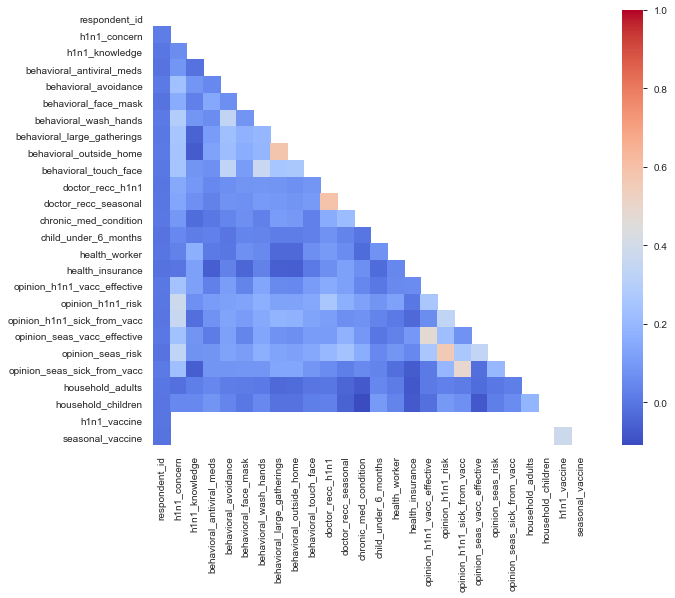

In [27]:
corr=vaccine_data.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

with sns.axes_style("white"):
    f, ax=plt.subplots(figsize=(12,8))
    ax=sns.heatmap(corr,mask=mask,vmax=1,square=True,cmap='coolwarm')

In [28]:
#sns.boxplot(data=vaccine_data,y='seasonal_vaccine ',x='health worker')

In [29]:
#from sklearn.preprocessing import LabelEncoder

#encoder=LabelEncoder()

#for i in vaccine_data:
    #vaccine_data[i]=encoder.fit_transform(vaccine_data[i])
  #  vaccine_data.head()

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(feature_data)
prof.to_file(output_file='output.html')